In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import pytesseract
import cv2
import itertools

In [3]:
p=420/1400
confidence=0.99
n=1400

In [4]:
stats.norm.interval(confidence=confidence,    # Confidence level             
                   loc = p,     # Point estimate of proportion
                   scale = math.sqrt((p*(1-p))/n))  # Scaling factor


(0.26845266270898316, 0.3315473372910168)

#Q19

In [5]:
p=80/100
confidence=0.95
n=100

In [6]:
stats.norm.interval(confidence=confidence,    # Confidence level             
                   loc = p,     # Point estimate of proportion
                   scale = math.sqrt((p*(1-p))/n))  # Scaling factor


(0.7216014406183979, 0.8783985593816022)

#Q20

In [7]:
p=300/400
confidence=0.99
n=400

In [8]:
stats.norm.interval(confidence=confidence,    # Confidence level             
                   loc = p,     # Point estimate of proportion
                   scale = math.sqrt((p*(1-p))/n))  # Scaling factor


(0.6942316596828568, 0.8057683403171432)

#Q21

In [9]:
p=250/400
confidence=0.95
n=400

In [10]:
stats.norm.interval(confidence=confidence,    # Confidence level             
                   loc = p,     # Point estimate of proportion
                   scale = math.sqrt((p*(1-p))/n))  # Scaling factor


(0.5775568258044378, 0.6724431741955622)

#Q22

In [11]:
p=30/250
confidence=0.95
n=250

In [12]:
stats.norm.interval(confidence=confidence,    # Confidence level             
                   loc = p,     # Point estimate of proportion
                   scale = math.sqrt((p*(1-p))/n))  # Scaling factor


(0.07971809083644124, 0.16028190916355875)

In [13]:
p=15/40
confidence=0.95
N=250
n=40
correrction_factor = np.sqrt(250-40)/np.sqrt(250-1)

In [14]:
z = stats.norm.ppf(confidence + (1-confidence)/2)
moe = z*np.sqrt(p*(1-p)/n)*correrction_factor
print((p-moe,p+moe))

(0.23722078319486045, 0.5127792168051395)


#Q23

In [15]:
N=300
n=36
std=5
confidence=0.95
correrction_factor=np.sqrt(N-n)/np.sqrt(N-1)

In [16]:
z = stats.norm.ppf(confidence + (1-confidence)/2)
moe = z*np.sqrt(std/np.sqrt(36))*correrction_factor
print((35-moe,35+moe))

(33.31878275051211, 36.68121724948789)


#Q24

In [17]:
N=500
n=49
std=9
confidence=0.99
correrction_factor=np.sqrt(N-n)/np.sqrt(N-1)

In [18]:
z = stats.norm.ppf(confidence + (1-confidence)/2)
moe = z*(std/np.sqrt(n))*correrction_factor
print((40-moe,40+moe))

(36.85153008973668, 43.14846991026332)


#Q25

In [19]:
N=400
n=50
std=0.5
confidence=0.99
correrction_factor=np.sqrt(N-n)/np.sqrt(N-1)
z = stats.norm.ppf(confidence + (1-confidence)/2)
moe = z*(std/np.sqrt(n))*correrction_factor
print((3.24-moe,3.24+moe))

(3.0694115370586585, 3.410588462941342)


#Q26

In [20]:
N=300
n=30
p=18/30
confidence=0.95
correrction_factor=np.sqrt(N-n)/np.sqrt(N-1)

In [21]:
z = stats.norm.ppf(confidence + (1-confidence)/2)
moe = z*np.sqrt(p*(1-p)/n)*correrction_factor
print((p-moe,p+moe))

(0.433413665430759, 0.766586334569241)


In [22]:
confidence = 0.99
e=0.05
s=0.279
n=(stats.norm.ppf(confidence+(1-confidence)/2)*s/e)**2
print(np.ceil(n))

207.0


#Q27

In [23]:
confidence = 0.95
e=2
s=10
n=(stats.norm.ppf(confidence+(1-confidence)/2)*s/e)**2
print(np.ceil(n))

97.0


#Q28

In [24]:
confidence = 0.99
e=5
s=15
n=(stats.norm.ppf(confidence+(1-confidence)/2)*s/e)**2
print(np.ceil(n))

60.0


#Q29

In [25]:
confidence = 0.95
e=0.25
s=3
n=(stats.norm.ppf(confidence+(1-confidence)/2)*s/e)**2
print(np.ceil(n))

554.0


#Q30

In [26]:
confidence = 0.95
e=0.2
s=0.5
n=(stats.norm.ppf(confidence+(1-confidence)/2)*s/e)**2
print(np.ceil(n))

25.0


In [27]:
0.2*0.8*(stats.norm.ppf(confidence+(1-confidence)/2)/0.02)**2

1536.5835282776502

#Q31

In [28]:
confidence = 0.95
e=0.05
p=0.15
n=p*(1-p)*(stats.norm.ppf(confidence+(1-confidence)/2)/e)**2
print(np.ceil(n))

196.0


#Q32

In [29]:
confidence = 0.99
e=0.1
p=0.45
n=p*(1-p)*(stats.norm.ppf(confidence+(1-confidence)/2)/e)**2
print(np.ceil(n))

165.0


#Q33

In [30]:
confidence = 0.95
e=0.04
p=0.6
n=p*(1-p)*(stats.norm.ppf(confidence+(1-confidence)/2)/e)**2
print(np.ceil(n))

577.0


In [31]:
confidence = 0.95
e=0.04
p=0.5
n=p*(1-p)*(stats.norm.ppf(confidence+(1-confidence)/2)/e)**2
print(np.ceil(n))

601.0


#Q34

In [32]:
confidence = 0.9
e=0.03
p=0.3
n=p*(1-p)*(stats.norm.ppf(confidence+(1-confidence)/2)/e)**2
print(np.ceil(n))

632.0


#Q41

In [33]:
path = 'C:\\Users\\kakut\\OneDrive\\Desktop\\ocr images\\'
image_file = f'{path}photo_2024-03-02_16-54-00.jpg'
img = cv2.imread(image_file)


#Graying of the jpg file

In [34]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imwrite(f"{path}\\temp\\index_gray.png", gray)

True

#converting the pixels using the binary thresh

In [35]:
_, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)
cv2.imwrite(f"{path}\\temp\\index_thresh.png", thresh)

True

#Dilating the characters to aid in drawing bounding boxes around regions of interest

In [36]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
dilated = cv2.dilate(thresh, kernel, iterations=5)
cv2.imwrite(f"{path}\\temp\\index_dilated.png", dilated)

True

#Eroding away trailing pixels around the corners of the page

In [37]:
eroded = cv2.erode(dilated, kernel, iterations=1)
cv2.imwrite(f"{path}\\temp\\index_eroded.png", eroded)

True

In [38]:
cnts = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[0])

In [39]:
results  = []
rois = []
for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    if h > 200 and w > 20:
        roi = img[y:y+h, x:x+w]
        rois.append(roi)
        cv2.rectangle(img, (x, y), (x+w, y+h), (36, 255, 12), 2)
        ocr_result = pytesseract.image_to_string(roi)
        ocr_result = ocr_result.split("\n")
        for item in ocr_result:
            results.append(item)
cv2.imwrite(f"{path}\\temp\\index_bbox_new.png", img)


True

In [40]:
# Extract text from the first and fifth ROIs
roi1_text = pytesseract.image_to_string(rois[1])
roi4_text = pytesseract.image_to_string(rois[4])

# Strings to exclude from the extracted text
exclude_strings = ("Physician")

# Combine text from both ROIs and filter out specified strings
col1 = [i for i in roi1_text.split("\n") + roi4_text.split("\n") if i.strip() and i not in exclude_strings]

# Get the length of the combined list
len(col1)

39

In [41]:
col2 = ['S','P','P','P','P','P','S','S','G','S','S','S','P','P','P','P','G','G','S','P','P','P','P','P','S','S','S','G','G','G','P','P','P','P','P','P','S','P','P']

In [42]:
df=pd.DataFrame({'Physician':col1,'Type of practice':col2})
df

,Physician,Type of practice
0,"R. E. Scherbarth, M.D.",S
1,"Crystal R. Goveia, M.D.",P
2,"Mark D. Hillard, M.D.",P
3,"Jeanine S. Huttner, M.D.",P
4,"Francis Aona, M.D.",P
5,"Janet Arrowsmith, M.D.",P
6,"David DeFrance, M.D.",S
7,"Judith Furlong, M.D.",S
8,"Leslie Jackson, M.D.",G
9,"Paul Langenkamp, M.D.",S


#Random sampling technique

In [43]:
random_samples = df.sample(n=5)
random_samples

,Physician,Type of practice
16,"Ronald Reynolds, M.D.",G
9,"Paul Langenkamp, M.D.",S
14,"Ricardo Pena, M.D.",P
24,Harry Mayhew M.D.,S
34,"Richard Koby, M.D.",P


#Systematic sampling technique

In [44]:
start_row = 4
step = 5
systematic_sample = df.iloc[start_row::step]
systematic_sample


,Physician,Type of practice
4,"Francis Aona, M.D.",P
9,"Paul Langenkamp, M.D.",S
14,"Ricardo Pena, M.D.",P
19,"Mark Young, M.D.",P
24,Harry Mayhew M.D.,S
29,"Mark DeMichiei, M.D.",G
34,"Richard Koby, M.D.",P


#Stratified sampling technique

In [45]:
sample_s = df.loc[df['Type of practice']=='S'].sample(n=2)
sample_p = df.loc[df['Type of practice']=='P'].sample(n=2)
sample_g = df.loc[df['Type of practice']=='G'].sample(n=1)

sample = pd.concat([sample_s,sample_p,sample_g])
sample

,Physician,Type of practice
10,"Philip Lepkowski, M.D.",S
36,"Douglas Smucker, M.D.",S
3,"Jeanine S. Huttner, M.D.",P
33,"Charles Holt, D.O.",P
17,"Mark Steinmetz, M.D.",G


#Q44

In [46]:
pop=pd.DataFrame([90,72,75,60,75,72,84,72,88,74,105,115,68,84,80,64,104,82,48,58,60,80,48,58,108])
print(pop)

      0
0    90
1    72
2    75
3    60
4    75
5    72
6    84
7    72
8    88
9    74
10  105
11  115
12   68
13   84
14   80
15   64
16  104
17   82
18   48
19   58
20   60
21   80
22   48
23   58
24  108


In [47]:
pop.sample(5)

,0
14,80
21,80
0,90
20,60
12,68


In [48]:
start_row = 2
step = 5
systematic_sample = pop.iloc[start_row::step]
systematic_sample


,0
2,75
7,72
12,68
17,82
22,48


In [49]:
sample_1 = pop.iloc[:-5].sample(n=3)
sample_2 = pop.iloc[-5:].sample(n=2)

sample = pd.concat([sample_1,sample_2])
sample

,0
4,75
0,90
7,72
24,108
22,48


#Q45

In [50]:
print('All the possible combinations of a population size of 5 and k=2:',math.comb(5,2))

All the possible combinations of a population size of 5 and k=2: 10


In [51]:
stdnt = ['Taylor','Hurley','Fowler','Rousche','Telatko']
num = [4,3,5,3,2]
df=pd.DataFrame({'Student':stdnt,'Number Correct':num})
df

,Student,Number Correct
0,Taylor,4
1,Hurley,3
2,Fowler,5
3,Rousche,3
4,Telatko,2


In [52]:
# Generate all possible combinations of elements
combinations = list(itertools.combinations(df['Student'], 2))  # Change 2 to the desired combination size

# Print the combinations
for combination in combinations:
    print(combination)

('Taylor', 'Hurley')
('Taylor', 'Fowler')
('Taylor', 'Rousche')
('Taylor', 'Telatko')
('Hurley', 'Fowler')
('Hurley', 'Rousche')
('Hurley', 'Telatko')
('Fowler', 'Rousche')
('Fowler', 'Telatko')
('Rousche', 'Telatko')


In [53]:
# Generate all possible combinations of elements
combinations = list(itertools.combinations(df['Number Correct'], 2))  # Change 2 to the desired combination size

# Print the combinations
for combination in combinations:
    print(combination)

(4, 3)
(4, 5)
(4, 3)
(4, 2)
(3, 5)
(3, 3)
(3, 2)
(5, 3)
(5, 2)
(3, 2)


In [54]:
combination_means = [sum(combination) / len(combination) for combination in combinations]

# Create a DataFrame to store the results
df = pd.DataFrame({'Combination': combinations, 'Mean': combination_means})

# Print the DataFrame
print(df)

  Combination  Mean
0      (4, 3)   3.5
1      (4, 5)   4.5
2      (4, 3)   3.5
3      (4, 2)   3.0
4      (3, 5)   4.0
5      (3, 3)   3.0
6      (3, 2)   2.5
7      (5, 3)   4.0
8      (5, 2)   3.5
9      (3, 2)   2.5


In [55]:
dff = df['Mean'].value_counts()
dff = pd.DataFrame({'Mean':dff.index,'Counts':dff.values}).sort_values(by='Mean',ascending=True).reset_index()
dff['Relative Frequency'] = dff['Counts']/np.sum(dff['Counts'])
print('The population mean:',np.mean(dff['Mean']))
dff

The population mean: 3.5


,index,Mean,Counts,Relative Frequency
0,3,2.5,2,0.2
1,1,3.0,2,0.2
2,0,3.5,3,0.3
3,2,4.0,2,0.2
4,4,4.5,1,0.1


#Q46

In [56]:
name=['Mr.Jones','Ms.Smith','Mr.Kirk','Mr.Small','Mr.Hugh','Mr.Sioto']
age=[54,50,52,48,50,52]
df=pd.DataFrame({'Name':name,'Age':age})
df

,Name,Age
0,Mr.Jones,54
1,Ms.Smith,50
2,Mr.Kirk,52
3,Mr.Small,48
4,Mr.Hugh,50
5,Mr.Sioto,52


In [57]:
print(f'The number of all possible samples of size 2 is {math.comb(6,2)}')

The number of all possible samples of size 2 is 15


In [58]:
combinations = list(itertools.combinations(df['Age'],2))
combination_means = [sum(combination) / len(combination) for combination in combinations]
df = pd.DataFrame({'Combinations':combinations,'Means':combination_means})
df

,Combinations,Means
0,"(54, 50)",52.0
1,"(54, 52)",53.0
2,"(54, 48)",51.0
3,"(54, 50)",52.0
4,"(54, 52)",53.0
5,"(50, 52)",51.0
6,"(50, 48)",49.0
7,"(50, 50)",50.0
8,"(50, 52)",51.0
9,"(52, 48)",50.0


   Means  Count
0   49.0      2
1   50.0      3
2   51.0      5
3   52.0      3
4   53.0      2

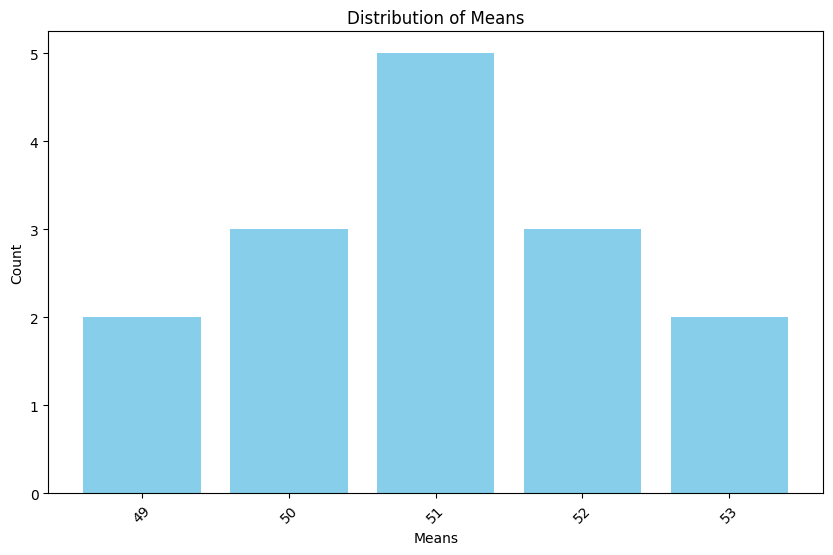

In [59]:
dff = df['Means'].value_counts()
dff = pd.DataFrame({'Means':dff.index,'Count':dff.values}).sort_values(by='Means',ascending=True).reset_index(drop=True)
print(dff)
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot
plt.bar(x=dff['Means'], height=dff['Count'], color='skyblue')

# Add labels and title
plt.xlabel('Means')
plt.ylabel('Count')
plt.title('Distribution of Means')

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=45)

# Show plot
plt.show()

#Q49

In [60]:
n=85
mean=6.5
std=1.7
confidence=0.95

z = stats.norm.ppf(confidence + (1-confidence)/2)
moe = z*(std/np.sqrt(n))*correrction_factor
print((mean-moe,mean+moe))

(6.156573473393268, 6.843426526606732)


#Q50

In [61]:
N=900
n=414
p=n/N
confidence=0.99
z = stats.norm.ppf(confidence + (1-confidence)/2)
moe = z*np.sqrt(p*(1-p)/n)
print((p-moe,p+moe))

(0.3969053254179663, 0.5230946745820337)


#Q51

In [62]:
confidence = 0.95
e=0.05
p=0.6
n=p*(1-p)*(stats.norm.ppf(confidence+(1-confidence)/2)/e)**2
print(np.ceil(n))

369.0


#Q52

In [63]:
N=500
n=350
p=n/N
confidence=0.99
z = stats.norm.ppf(confidence + (1-confidence)/2)
moe = z*np.sqrt(p*(1-p)/n)
print((p-moe,p+moe))

(0.6369053254179663, 0.7630946745820336)


#Q53

In [64]:
confidence = 0.9
e=2
s=14
n=(stats.norm.ppf(confidence+(1-confidence)/2)*s/e)**2
print(np.ceil(n))

133.0


#Q55

In [65]:
mean=3.01
std=0.03
confidence=0.95

z = stats.norm.ppf(confidence + (1-confidence)/2)
moe = z*(std/np.sqrt(n))
print((mean-moe,mean+moe))

(3.0048932564512763, 3.0151067435487233)


#Q56

In [66]:
mean=54
std=4.50
confidence=0.95

z = stats.norm.ppf(confidence + (1-confidence)/2)
moe = z*(std/np.sqrt(n))
print((mean-moe,mean+moe))

(53.23398846769148, 54.76601153230852)


#Q57

In [67]:
N=50
n=26
p=n/N
confidence=0.99
z = stats.norm.ppf(confidence + (1-confidence)/2)
moe = z*np.sqrt(p*(1-p)/n)
print((p-moe,p+moe))

(0.2676213016718653, 0.7723786983281347)


#Q58

In [68]:
mean=1.179
std=0.03
confidence=0.99

z = stats.norm.ppf(confidence + (1-confidence)/2)
moe = z*(std/np.sqrt(n))
print((mean-moe,mean+moe))

(1.1638451493663693, 1.1941548506336308)


#Q59

In [69]:
N=1200
n=792
p=n/N
confidence=0.95
z = stats.norm.ppf(confidence + (1-confidence)/2)
moe = z*np.sqrt(p*(1-p)/n)
print((p-moe,p+moe))

(0.6270088900985432, 0.6929911099014568)


#Q60

In [70]:
mean=12
std=3
confidence=0.99

z = stats.norm.ppf(confidence + (1-confidence)/2)
moe = z*(std/np.sqrt(n))
print((mean-moe,mean+moe))

(11.725415673636801, 12.274584326363199)


In [71]:
mean=12
std=6
confidence=0.99
n=40

z = stats.norm.ppf(confidence + (1-confidence)/2)
moe = z*(std/np.sqrt(n))
print((mean-moe,mean+moe))

(9.556353761094071, 14.443646238905929)


In [72]:
mean=12
std=8
confidence=0.99

z = stats.norm.ppf(confidence + (1-confidence)/2)
moe = z*(std/np.sqrt(n))
print((mean-moe,mean+moe))

(8.741805014792096, 15.258194985207904)


#Q63

In [73]:
confidence = 0.95
e=0.03
p=0.5
n=p*(1-p)*(stats.norm.ppf(confidence+(1-confidence)/2)/e)**2
print(np.ceil(n))

1068.0


In [74]:
confidence = 0.95
e=0.03
p=0.21
n=p*(1-p)*(stats.norm.ppf(confidence+(1-confidence)/2)/e)**2
print(np.ceil(n))

709.0


#Q65

In [75]:
use = [0,1,2,3,4,5]
freq = [25,30,20,10,10,5]

df = pd.DataFrame({'Use_per_month':use,'Frequency':freq})
print(f'The proportion of employees that do not use the ATM is {df['Frequency'][0]/np.sum(df['Frequency'])*100}%')
df

The proportion of employees that do not use the ATM is 25.0%


,Use_per_month,Frequency
0,0,25
1,1,30
2,2,20
3,3,10
4,4,10
5,5,5


In [76]:
p = df['Frequency'][0]/np.sum(df['Frequency'])
confidence = 0.95
z=stats.norm.ppf(confidence + (1-confidence)/2)
moe = z*np.sqrt(p*(1-p)/100)
print((p-moe,p+moe))

(0.1651310699442871, 0.3348689300557129)


In [77]:
print(f'The average number of transactions made by the employees is {np.sum(df['Use_per_month']*df['Frequency'])/sum(df['Frequency'])}')

The average number of transactions made by the employees is 1.65


In [78]:
mean = np.sum(df['Use_per_month']*df['Frequency'])/sum(df['Frequency'])
var = np.sum(np.square(df['Use_per_month']-mean)*df['Frequency'])/100
std=var**0.5
confidence = 0.95
z=stats.norm.ppf(confidence + (1-confidence)/2)
moe = z*std/np.sqrt(100)

In [79]:
print((mean-moe,mean+moe))

(1.3641205911397822, 1.9358794088602176)


In [80]:
N=200
n=80
p=n/N
confidence=0.90
z = stats.norm.ppf(confidence + (1-confidence)/2)
moe = z*np.sqrt(p*(1-p)/N)
print((p-moe,p+moe))

(0.3430205989421221, 0.45697940105787793)


In [81]:
mean=110
std=30
confidence=0.95
n=200

z = stats.norm.ppf(confidence + (1-confidence)/2)
moe = z*(std/np.sqrt(n))
print((mean-moe,mean+moe))

(105.84228852695097, 114.15771147304903)


In [82]:
confidence = 0.95
e=0.02
p=0.1
n=p*(1-p)*(stats.norm.ppf(confidence+(1-confidence)/2)/e)**2
print(np.ceil(n))

865.0
